# A Beginners Guide to Beating the Bookmakers with TensorFlow

Let's first run the predict script.

In [1]:
%run -i predict.py

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1267689b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.

INFO:tensorflow:Starting evaluation at 2019-04-26T12:10:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:10:11
INFO:tensorflow:Saving dict for global step 400: accuracy = 0.4651163, average_loss = 1.0672741, global_step = 400, loss = 91.785576
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 400: model/model.ckpt-400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-400
I

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 900 into model/model.ckpt.
INFO:tensorflow:loss = 531.4868, step = 901
INFO:tensorflow:Saving checkpoints for 1000 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 531.2261.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:10:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:10:33
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.4651163, average_loss = 1.0629601, global_step = 1000, loss = 91.41457
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: model/model.ckpt-1000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:G

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1500 into model/model.ckpt.
INFO:tensorflow:loss = 529.1681, step = 1501
INFO:tensorflow:Saving checkpoints for 1600 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 530.4468.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:10:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-1600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:10:56
INFO:tensorflow:Saving dict for global step 1600: accuracy = 0.4651163, average_loss = 1.0631485, global_step = 1600, loss = 91.43077
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1600: model/mod

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-2100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2100 into model/model.ckpt.
INFO:tensorflow:loss = 525.36865, step = 2101
INFO:tensorflow:Saving checkpoints for 2200 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 514.45154.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:11:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-2200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:11:18
INFO:tensorflow:Saving dict for global step 2200: accuracy = 0.4651163, average_loss = 1.063589

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-2700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2700 into model/model.ckpt.
INFO:tensorflow:loss = 530.22284, step = 2701
INFO:tensorflow:Saving checkpoints for 2800 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 530.7851.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:11:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-2800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:11:41
INFO:tensorfl

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-3300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-3300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3300 into model/model.ckpt.
INFO:tensorflow:loss = 530.0779, step = 3301
INFO:tensorflow:Saving checkpoints for 3400 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 533.6853.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:12:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-3400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3900 into model/model.ckpt.
INFO:tensorflow:loss = 529.75604, step = 3901
INFO:tensorflow:Saving checkpoints for 4000 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 543.9703.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:12:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from mod

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4500: model/model.ckpt-4500
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-4500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-4500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4500 into model/model.ckpt.
INFO:tensorflow:loss = 528.28485, step = 4501
INFO:tensorflow:Saving checkpoints for 4600 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 524.4276.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5100: model/model.ckpt-5100
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-5100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-5100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5100 into model/model.ckpt.
INFO:tensorflow:loss = 527.41156, step = 5101
INFO:tensorflow:Saving checkpoints for 5200 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 527.9201.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26

INFO:tensorflow:Saving dict for global step 5700: accuracy = 0.4651163, average_loss = 1.0641179, global_step = 5700, loss = 91.514145
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5700: model/model.ckpt-5700
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-5700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-5700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5700 into model/model.ckpt.
INFO:tensorflow:loss = 534.27985, step = 5701
INFO:tensorflow:Saving checkpoints for 5800 into model/model.ckpt.
INFO:tensorflow:Loss for final ste

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:13:49
INFO:tensorflow:Saving dict for global step 6300: accuracy = 0.4651163, average_loss = 1.062896, global_step = 6300, loss = 91.40906
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6300: model/model.ckpt-6300
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-6300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-6300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6300 into model/model.ckpt.
INFO:tensorflow:loss = 526.57007, step = 6301


INFO:tensorflow:Restoring parameters from model/model.ckpt-6900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:14:10
INFO:tensorflow:Saving dict for global step 6900: accuracy = 0.4651163, average_loss = 1.0623242, global_step = 6900, loss = 91.35988
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6900: model/model.ckpt-6900
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-6900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-6900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tens

INFO:tensorflow:Starting evaluation at 2019-04-26T12:14:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-7500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:14:31
INFO:tensorflow:Saving dict for global step 7500: accuracy = 0.4651163, average_loss = 1.062463, global_step = 7500, loss = 91.37182
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7500: model/model.ckpt-7500
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-7500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-7

INFO:tensorflow:Loss for final step: 515.5882.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:14:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-8100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:14:51
INFO:tensorflow:Saving dict for global step 8100: accuracy = 0.4651163, average_loss = 1.0612618, global_step = 8100, loss = 91.26852
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8100: model/model.ckpt-8100
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-8100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Crea

INFO:tensorflow:loss = 523.7961, step = 8601
INFO:tensorflow:Saving checkpoints for 8700 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 525.589.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:15:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-8700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:15:12
INFO:tensorflow:Saving dict for global step 8700: accuracy = 0.4651163, average_loss = 1.0600697, global_step = 8700, loss = 91.16599
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8700: model/model.ckpt-8700
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-8700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runni

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9200 into model/model.ckpt.
INFO:tensorflow:loss = 530.8161, step = 9201
INFO:tensorflow:Saving checkpoints for 9300 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 530.8254.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:15:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-9300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:15:34
INFO:tensorflow:Saving dict for global step 9300: accuracy = 0.4651163, average_loss = 1.0590947, global_step = 9300, loss = 91.082146
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9300: model/model.ckpt-9300
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:

INFO:tensorflow:Restoring parameters from model/model.ckpt-9800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9800 into model/model.ckpt.
INFO:tensorflow:loss = 521.4615, step = 9801
INFO:tensorflow:Saving checkpoints for 9900 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 525.5443.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:15:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-9900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:15:55
INFO:tensorflow:Saving dict for global step 9900: accuracy = 0.4651163, average_loss = 1.0559838, global_step = 9900, loss = 90.814606
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9900: model/model.ckpt-9900
INFO:tensorflow:Calling

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10400 into model/model.ckpt.
INFO:tensorflow:loss = 526.6205, step = 10401
INFO:tensorflow:Saving checkpoints for 10500 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 531.4924.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:16:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-10500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:16:16
INFO:tensorflow:Saving dict for global step 10500: accuracy = 0.4651163, average_loss = 1.05

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-11000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11000 into model/model.ckpt.
INFO:tensorflow:loss = 527.1578, step = 11001
INFO:tensorflow:Saving checkpoints for 11100 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 516.0728.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:16:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-11100
INFO:tensorflow:Running local_init_op.
INFO:tenso

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 11600: model/model.ckpt-11600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-11600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-11600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11600 into model/model.ckpt.
INFO:tensorflow:loss = 514.7029, step = 11601
INFO:tensorflow:Saving checkpoints for 11700 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 505.50055.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 201

INFO:tensorflow:Saving dict for global step 12200: accuracy = 0.4883721, average_loss = 1.0243652, global_step = 12200, loss = 88.095406
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12200: model/model.ckpt-12200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-12200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-12200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12200 into model/model.ckpt.
INFO:tensorflow:loss = 516.5401, step = 12201
INFO:tensorflow:Saving checkpoints for 12300 into model/model.ckpt.
INFO:tensorflow:Loss for f

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:17:37
INFO:tensorflow:Saving dict for global step 12800: accuracy = 0.50581396, average_loss = 1.0060723, global_step = 12800, loss = 86.52222
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12800: model/model.ckpt-12800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-12800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-12800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12800 into model/model.ckpt

INFO:tensorflow:Starting evaluation at 2019-04-26T12:17:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-13400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:18:00
INFO:tensorflow:Saving dict for global step 13400: accuracy = 0.5, average_loss = 1.0012825, global_step = 13400, loss = 86.11029
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13400: model/model.ckpt-13400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-13400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-

INFO:tensorflow:Saving checkpoints for 14000 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 502.90802.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:18:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:18:20
INFO:tensorflow:Saving dict for global step 14000: accuracy = 0.49418604, average_loss = 1.0013534, global_step = 14000, loss = 86.11639
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14000: model/model.ckpt-14000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-14000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:C

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14500 into model/model.ckpt.
INFO:tensorflow:loss = 498.84164, step = 14501
INFO:tensorflow:Saving checkpoints for 14600 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 502.6743.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:18:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-14600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:18:43
INFO:tensorflow:Saving dict for global step 14600: accuracy = 0.5, average_loss = 0.993697, global_step = 14600, loss = 85.45794
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14600: model/model.ckpt-14600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorfl

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-15100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15100 into model/model.ckpt.
INFO:tensorflow:loss = 495.06622, step = 15101
INFO:tensorflow:Saving checkpoints for 15200 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 492.7733.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:19:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-15200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:19:04
INFO:tensorflow:Saving dict for global step 15200: accuracy = 0.5, average_loss = 0.9928907, global_step = 15200, loss = 85.3886
INFO:tensorflow:Saving 'checkpoint_

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-15700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15700 into model/model.ckpt.
INFO:tensorflow:loss = 493.5831, step = 15701
INFO:tensorflow:Saving checkpoints for 15800 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 500.38266.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:19:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-15800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:19:27
INFO:ten

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-16300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-16300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16300 into model/model.ckpt.
INFO:tensorflow:loss = 492.85376, step = 16301
INFO:tensorflow:Saving checkpoints for 16400 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 508.57855.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:19:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters fr

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16900: model/model.ckpt-16900
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-16900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-16900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16900 into model/model.ckpt.
INFO:tensorflow:loss = 498.04184, step = 16901
INFO:tensorflow:Saving checkpoints for 17000 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 500.51834.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 20

INFO:tensorflow:Saving dict for global step 17500: accuracy = 0.5, average_loss = 0.9882685, global_step = 17500, loss = 84.99109
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17500: model/model.ckpt-17500
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-17500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-17500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17500 into model/model.ckpt.
INFO:tensorflow:loss = 496.82275, step = 17501
INFO:tensorflow:Saving checkpoints for 17600 into model/model.ckpt.
INFO:tensorflow:Loss for final s

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:20:47
INFO:tensorflow:Saving dict for global step 18100: accuracy = 0.49418604, average_loss = 0.9890859, global_step = 18100, loss = 85.061386
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18100: model/model.ckpt-18100
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-18100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-18100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18100 into model/model.ckp

INFO:tensorflow:Starting evaluation at 2019-04-26T12:21:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-18700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:21:08
INFO:tensorflow:Saving dict for global step 18700: accuracy = 0.5116279, average_loss = 0.9858101, global_step = 18700, loss = 84.77967
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18700: model/model.ckpt-18700
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-18700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model

INFO:tensorflow:Saving checkpoints for 19300 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 481.75458.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:21:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-19300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:21:31
INFO:tensorflow:Saving dict for global step 19300: accuracy = 0.5, average_loss = 0.9861239, global_step = 19300, loss = 84.806656
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19300: model/model.ckpt-19300
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-19300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19800 into model/model.ckpt.
INFO:tensorflow:loss = 492.21667, step = 19801
INFO:tensorflow:Saving checkpoints for 19900 into model/model.ckpt.
INFO:tensorflow:Loss for final step: 493.81628.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T12:21:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-19900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-12:21:52
INFO:tensorflow:Saving dict for global step 19900: accuracy = 0.5, average_loss = 0.9816091, global_step = 19900, loss = 84.41838
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19900: model/model.ckpt-19900
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorfl

Import the training log saved by the script and plot this

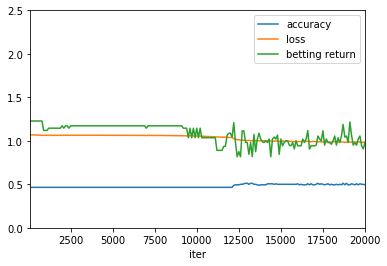

In [9]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('training-log.csv', header=None, names=['iter','accuracy','loss','betting return']).set_index('iter')
_ = df.plot(ylim=(0,2.5))

In [ ]:
Betting return differs significantly from the return specified on site.